In [ ]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
from shapely.geometry import Point
import os
import json

from mappymatch import package_root
from mappymatch.constructs.geofence import Geofence
from mappymatch.constructs.trace import Trace
from mappymatch.maps.nx.nx_map import NxMap
from mappymatch.maps.nx.nx_map import NxMap, NetworkType
from mappymatch.matchers.lcss.lcss import LCSSMatcher
from mappymatch.matchers.line_snap import LineSnapMatcher
from mappymatch.matchers.valhalla import ValhallaMatcher
from mappymatch.matchers.osrm import OsrmMatcher
import networkx as nx
import matplotlib.pyplot as plt
from shapely import wkt

In [3]:
path = "/work/lpsha/data/hovding/routes_raw/"

In [7]:
files = os.listdir(path)

<Axes: >

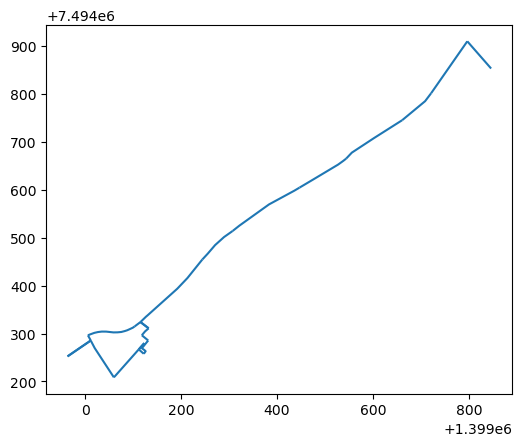

In [ ]:
f = open(path+files[125])
s=f.read()
data = json.loads(s)
eg=data["tripObject"]['tripData']['locationArray']

df = pd.DataFrame(eg)
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude, df.latitude),crs="EPSG:4326")
trace_obj = Trace.from_dataframe(gdf)

geofence = Geofence.from_trace(trace_obj, padding=2e3)
nx_map = NxMap.from_geofence(geofence, network_type=NetworkType.ALL)
matcher = LCSSMatcher(nx_map,cutting_threshold=10,distance_epsilon=50,similarity_cutoff=0.9,random_cuts=0,distance_threshold=1000)

match_result = matcher.match_trace(trace_obj)
matched = match_result.path_to_geodataframe()
matched.plot()

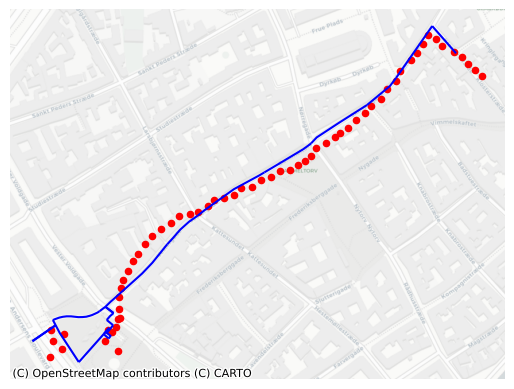

In [353]:
fig,ax=plt.subplots()
gdf_webmerc = gdf.to_crs(epsg=3857)
matched.to_crs(3857).plot(ax=ax,color='blue',label='matched')
gdf_webmerc.plot(ax=ax, color="red", markersize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

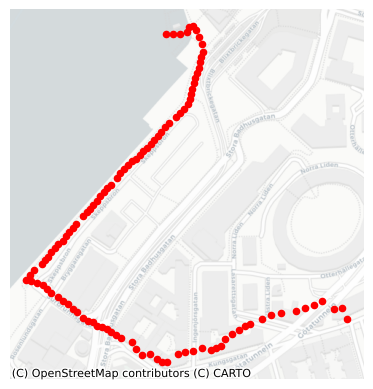

In [318]:
fig,ax=plt.subplots()
gdf_webmerc = gdf.to_crs(epsg=3857)
# points.to_crs(3857).plot(ax=ax,color='blue',label='matched')
gdf_webmerc.plot(ax=ax, color="red", markersize=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

In [208]:
df_network=pd.DataFrame(nx_map.to_dict()["links"])
df_network

/home/lpsha/.conda/envs/umap-env/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


,travel_time,kilometers,geometry,source,target,key,service,width
0,0.690123,0.009585,LINESTRING (1397439.6653291006 7495951.7026052...,375469,6513086917,0,NaN,NaN
1,1.720550,0.023897,LINESTRING (1397439.6653291006 7495951.7026052...,375469,298530864,0,NaN,NaN
2,1.123716,0.015607,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,298532851,0,NaN,NaN
3,1.326794,0.008292,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,7359826642,0,NaN,NaN
4,2.415579,0.015097,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,3294595610,0,NaN,NaN
...,...,...,...,...,...,...,...,...
14280,1.920728,0.012005,LINESTRING (1394711.013102725 7494689.13596942...,13202595786,12914401951,0,NaN,NaN
14281,4.823141,0.030145,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710853,0,NaN,NaN
14282,7.548904,0.047181,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710854,0,NaN,NaN
14283,2.215939,0.013850,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710855,0,NaN,NaN


In [ ]:
import numpy as np 
def get_line(start,end):
    try:
        return df_network.loc[(df_network['source']==start) & (df_network['target']==end)].geometry.values[0]
    except: 
        return np.nan
    
df_network=pd.DataFrame(nx_map.to_dict()["links"])
df_network

In [ ]:
df_network=pd.DataFrame(nx_map.to_dict()["links"])
df_network

/home/lpsha/.conda/envs/umap-env/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


,travel_time,kilometers,geometry,source,target,key,service,width
0,0.690123,0.009585,LINESTRING (1397439.6653291006 7495951.7026052...,375469,6513086917,0,NaN,NaN
1,1.720550,0.023897,LINESTRING (1397439.6653291006 7495951.7026052...,375469,298530864,0,NaN,NaN
2,1.123716,0.015607,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,298532851,0,NaN,NaN
3,1.326794,0.008292,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,7359826642,0,NaN,NaN
4,2.415579,0.015097,LINESTRING (1397423.156648616 7495955.84937022...,6513086917,3294595610,0,NaN,NaN
...,...,...,...,...,...,...,...,...
14280,1.920728,0.012005,LINESTRING (1394711.013102725 7494689.13596942...,13202595786,12914401951,0,NaN,NaN
14281,4.823141,0.030145,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710853,0,NaN,NaN
14282,7.548904,0.047181,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710854,0,NaN,NaN
14283,2.215939,0.013850,LINESTRING (1395165.831146259 7494580.17365033...,13147710852,13147710855,0,NaN,NaN


In [239]:
df_network.loc[(df_network['source']==781548)]

,travel_time,kilometers,geometry,source,target,key,service,width
351,2.878215,0.039975,LINESTRING (1396756.9874198618 7497541.6368129...,781548,3454092915,0,NaN,NaN
352,4.479720,0.049775,LINESTRING (1396756.9874198618 7497541.6368129...,781548,10870263839,0,NaN,NaN
353,8.330864,0.092565,LINESTRING (1396756.9874198618 7497541.6368129...,781548,10207931922,0,NaN,NaN
